# CmpE462
## Project Phase 3
### 08.06.2022
#### Alper Canberk Balcı - Sabri Gökberk Yılmaz

### Question 1
#### Question 1.A
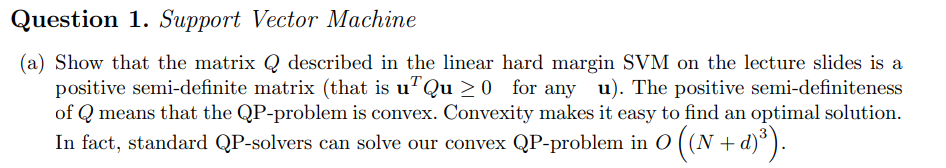
Show that the matrix Q described in the linear hard margin SVM on the lecture slides is a
positive semi-definite matrix (that is $u^T Qu$ ≥ 0 for any u).

Answer:
But, there is another definition for positive semidefinite matrices:

"A matrix M is called positive semidefinite if it is symmetric and all its eigenvalues are non-negative"

Q = $ \begin{bmatrix}
        0 & 0_d^T\\
        0_d & I_d
        \end{bmatrix} $ = $ \begin{bmatrix}
                             0 & 0 & ... & 0 & 0 & 0\\
                             0 & 1 & ... & 0 & 0 & 0\\ 
                           ... & ... & ... & 1 & 0 & 0\\
                           ... & ... & ... & 0 & 1 & 0\\
                             0 & 0 & ... & 0 & 0 & 1
                            \end{bmatrix} $

Q is a $(d+1)x(d+1)$ matrix like an identity matrix except that there is 0 instead of the 1 in the first column first row.

Eigenvalues of Q are 0 and 1. https://matrixcalc.org/tr/vectors.html#eigenvectors(%7B%7B0,0,0,0,0,0,0%7D,%7B0,1,0,0,0,0,0%7D,%7B0,0,1,0,0,0,0%7D,%7B0,0,0,1,0,0,0%7D,%7B0,0,0,0,1,0,0%7D,%7B0,0,0,0,0,1,0%7D,%7B0,0,0,0,0,0,1%7D%7D)

Because Q's eigenvalues are non-negative, Q is a positive semidefinite matrix.


#### Question 1.B

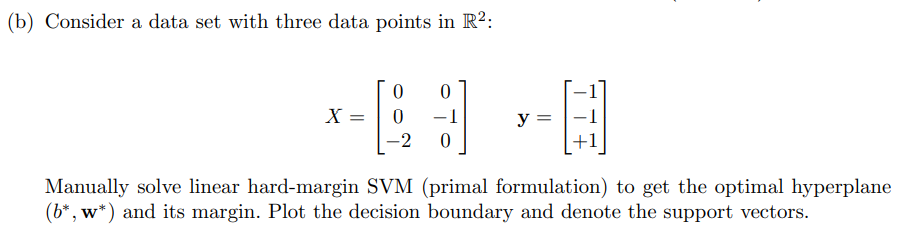

$ X =  \begin{bmatrix}
        0 & 0\\
        0 & -1\\
        -2 & 0
        \end{bmatrix} $ , $ y = \begin{bmatrix}
                                -1 \\
                                -1\\
                                1
                                \end{bmatrix} $ get optimal hyperplane $(w^* ,b^*)$
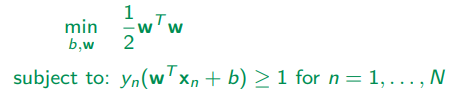


min $\frac{1}{2}.w^T.w = \frac{1}{2}.(w_1^2 + w_2^2)$

s.t.

$ -1(0.w_1 + 0.w_2 + b)\geq1 $ 

$ -1(0.w_1 + (-1).w_2 + b)\geq1 $ 
     
$ -1(-2.w_1 + 0.w_2 + b)\geq1 $ 

=>

$ b\leq-1$ ............... (1)

$ w_2 - b\geq1$ ........ (2)

$ -2.w_1 + b \geq1$ ...(3)

$ \mathcal{L} = \frac{1}{2}(w_1^2 + w_2^2) + \alpha_1(1+b)+\alpha_2(1-w_2+b) + \alpha_3(1+2.w_1-b)$

$ \frac{\partial \mathcal{L}}{\partial w_1} = w_1 + 2.\alpha_3 = 0  = > w_1 = -2.\alpha_3$

$ \frac{\partial \mathcal{L}}{\partial w_2} = w_2 - \alpha_2 = 0  = > w_2 = \alpha_2$

$ \frac{\partial \mathcal{L}}{\partial b} = \alpha_1 + \alpha_2 - \alpha_3 = 0 = > \alpha_3 = \alpha_1 +\alpha_2$

put the values into the equation: (and skip the putting step), equation becomes:

$ \mathcal{L} = -2.\alpha_1^2 -2.\alpha_2^2 - 4.\alpha_1.\alpha_2 + 2.\alpha_1 + 2.\alpha_2$

we can take the derivative of lagrangian function.

$ \frac{\partial \mathcal{L}}{\partial \alpha_1} = -4.\alpha_1 - 4.\alpha_2 + 2 = 0$

$ \frac{\partial \mathcal{L}}{\partial \alpha_2} = -4.\alpha_2 - 4.\alpha_1 + 2 = 0$

we can find $\alpha_3$ via:

$ -4.(\alpha_1+\alpha_2) = -2 = > \alpha_1+\alpha_2 = \frac{1}{2} = > \alpha_3 = \frac{1}{2}$

$ w_1 = -2.\alpha_3 = > w_1 = -1 $

from constraint (3):

$-2.w_1 + b\geq1$

$ b\geq-1$

from constraint (1) and (3):

$b\leq-1 = > b = -1$

from constraint (2)

$ w_2 - b\geq1 = > w_2\geq0$

as we want to minimize $ \frac{1}{2}.(w_1^2 + w_2^2)$, thus we can find that $w_2 = 0$.

$w* = \begin{bmatrix}
        -1 \\
        0        
        \end{bmatrix} $, $ b* = -1$
        
hyperplane equation is:  $-x_1-1=0$

$g(x) = sign(-x_1-1=0)$

margin: $\frac{1}{||w||} = \frac{1}{\sqrt1} = 1$

A data point, $x_n$ is called support vector if $y_n.(x_n^T.w^*+b^*)=1$

$x_1, x_2, x_3$ , all three are support vectors as they satisfy the equation.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
from sklearn import svm
from sklearn import metrics

In [72]:
from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import time

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import sklearn.datasets as dt
import matplotlib.pyplot as plt
import numpy as np
import copy
from PIL import Image

from sklearn.svm import SVC

In [32]:
# Question 1.C cvxopt

Q = cvxopt_matrix([[0.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
p = cvxopt_matrix([0.0, 0.0, 0.0])
A = cvxopt_matrix([[1.0, 1.0, -1.0],[0.0, 0.0 , 2.0],[0.0, -1.0, 0.0]]) # vertically stacked.
b = cvxopt_matrix([-1.0, -1.0, -1.0])
sol=cvxopt_solvers.qp(Q, p, A, b)

     pcost       dcost       gap    pres   dres
 0:  2.5606e-01  4.4983e-01  8e-01  1e+00  6e-16
 1:  3.8605e-01  4.8351e-01  4e-02  2e-01  4e-16
 2:  5.0271e-01  4.9877e-01  4e-03  6e-17  1e-15
 3:  5.0021e-01  4.9981e-01  4e-04  1e-16  1e-16
 4:  5.0003e-01  4.9997e-01  6e-05  3e-17  1e-16
 5:  5.0000e-01  5.0000e-01  8e-06  3e-16  6e-16
 6:  5.0000e-01  5.0000e-01  1e-06  3e-16  2e-16
 7:  5.0000e-01  5.0000e-01  2e-07  9e-18  5e-16
Optimal solution found.


In [33]:
print(sol['x'])

[-1.00e+00]
[-1.00e+00]
[ 3.93e-04]



Answer found is b* = -1 and w* = (w1*, w2*) = (-1,0.000393). So it is found correctly.

In [65]:
def read_data():

    pics = []  # array to stack flattened images initially
    for i in range(10000):
        image = Image.open("3dshapes_train/" + str(i) + ".jpg").convert(
            'L')  # reading image and applying grayscale conversion
        image = np.array(image).flatten()  # image flattened
        # -----------------------------------------#
        pics.append(image)
    trainx = np.array(pics).astype("float64")  # converting list to np array
    trainy = np.load("./orientations_train.npy", mmap_mode="r")  # reading labels

    label_map = {-30:0, -26:1, -22:2, -18:3, -13:4, -9:5, -5:6, 0:7, 4:8, 8:9, 12:10, 17:11, 21:12, 25:13, 30:14}
    trainy_integer = np.zeros((trainx.shape[0], 1))
    for i in range(len(trainy)):
        trainy_integer[i] = [label_map[math.floor(trainy[i])]]
    # below is reading of test set applying same procedures with train set
    pics_test = []
    for i in range(1000):
        image = Image.open("3dshapes_test/" + str(i) + ".jpg").convert('L')
        image = np.array(image).flatten()
        pics_test.append(image)
    testx = np.array(pics_test).astype("float64")
    testy = np.load("./orientations_test.npy", mmap_mode="r")
    testy_integer = np.zeros((testx.shape[0], 1))
    for i in range(len(testy)):
        testy_integer[i] = [label_map[math.floor(testy[i])]]
    return trainx, trainy_integer, testx, testy_integer



In [79]:
# data read for part e. This function is different, it maps to one hot encoding.
def read_data_e():
    pics = []  # array to stack flattened images initially
    for i in range(10000):
        image = Image.open("3dshapes_train/" + str(i) + ".jpg").convert(
            'L')  # reading image and applying grayscale conversion
        image = np.array(image).flatten()  # image flattened
        # -----------------------------------------#
        pics.append(image)
    trainx = np.array(pics).astype("float64")  # converting list to np array
    trainy = np.load("./orientations_train.npy", mmap_mode="r")  # reading labels

    label_map = {-30:0, -26:1, -22:2, -18:3, -13:4, -9:5, -5:6, 0:7, 4:8, 8:9, 12:10, 17:11, 21:12, 25:13, 30:14}
    trainy_one_hot = np.zeros((trainx.shape[0], 15))
    for i in range(len(trainy)):
        trainy_one_hot[i][label_map[math.floor(trainy[i])]] = 1
    # below is reading of test set applying same procedures with train set
    pics_test = []
    for i in range(1000):
        image = Image.open("3dshapes_test/" + str(i) + ".jpg").convert('L')
        image = np.array(image).flatten()
        pics_test.append(image)
    testx = np.array(pics_test).astype("float64")
    testy = np.load("./orientations_test.npy", mmap_mode="r")
    testy_one_hot = np.zeros((testx.shape[0], 15))
    for i in range(len(testy)):
        testy_one_hot[i][label_map[math.floor(testy[i])]] = 1
    return trainx, trainy_one_hot, testx, testy_one_hot, trainy, testy

In [ ]:
# Question 1.d
# Calculating matrix A seemed difficult. We don't have time unfortunately. 
# Probably in 30 minutes, we can write the solution for 1.d. We left it to the last 10 minutes but will not be finished probably.

### Question 1.e

In [80]:
trainx, trainy_one_hot, testx, testy_one_hot, trainy, testy = read_data_e()

In [81]:
trainy_one_hot.shape

(10000, 15)

In [82]:
# sampling only 0th and 1st classes, creating a new dataset with binary classes
a = np.zeros((10000))
b = np.zeros((10000))
a[:] = trainy_one_hot[:, 1] == 1
b[:] = trainy_one_hot[:, 0] == 1
#idx = np.any([a, b], axis=0)
#binary_y = idx
traina = trainx[a==True]
trainb = trainx[b==True]
binary_train = np.append(traina, trainb).reshape(-1, 4096)

In [83]:
binary_train.shape

(1318, 4096)

In [84]:
# binary labels of dataset
binary_trainy = np.zeros((binary_train.shape[0]))
binary_trainy[:len(traina)] = 1

In [85]:
# sampling test dataset from classes 0 and 1
testa = testy_one_hot[:, 1] == 1
testb = testy_one_hot[:, 0] == 1
#idx = np.any([a, b], axis=0)
#binary_y = idx
testa_data = testx[testa==True]
testb_data = testx[testb==True]
binary_test = np.append(testa_data, testb_data).reshape(-1, 4096)

In [86]:
# labels of test dataset
binary_testy = np.zeros((binary_test.shape[0]))
binary_testy[:len(testa_data)] = 1

In [87]:
binary_testy = binary_testy.reshape(-1)
binary_testy.shape

(133,)

In [88]:
binary_test.shape

(133, 4096)

#### Train Binary SVM for samples of 1 and 2 classes

In [89]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(binary_train, binary_trainy)

#Predict the response for test dataset
y_pred = clf.predict(binary_test)

In [90]:
print("Accuracy:",metrics.accuracy_score(binary_testy, y_pred))

Accuracy: 1.0


* scikit learn function implementation is probably optimized. Also, the implementation is using kernel trick.
https://scikit-learn.org/stable/modules/svm.html
* It supports multiclass case, which is used in this project.


### Question 1.f

In [66]:
# Without PCA
trainx, trainy, testx, testy = read_data()

In [77]:
t1 = time.time()
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(trainx, trainy)

#Predict the response for test dataset
y_pred = clf.predict(testx)

t2 = time.time()

time_dif = t2-t1
print(time_dif, "seconds")

C:\Users\Canbe\anaconda3\envs\bounAITask0\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


50.43042254447937 seconds


In [74]:
print("Accuracy:",metrics.accuracy_score(testy, y_pred))

Accuracy: 1.0


Accuracy is 1.0 without PCA.

In [69]:
# Feature reduction
pca = PCA(n_components=0.99) # construction of PCA object that preserves at least 90% of variance
pca.fit(trainx) # adjusting pca instance by train data
trainx_reduced = pca.transform(trainx) # applying pca on train data
testx_reduced = pca.transform(testx) # applying pca on test data

print("Size of new features after PCA: ", trainx_reduced.shape[1])
print("Used technique: PCA, implemented by scikit-learn.")

Size of new features after PCA:  67
Used technique: PCA, implemented by scikit-learn.


In [76]:
# With PCA Question1.f continued

t1 = time.time()
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(trainx_reduced, trainy)

#Predict the response for test dataset
y_pred = clf.predict(testx_reduced)

t2 = time.time()

time_dif = t2-t1
print(time_dif, "seconds")

C:\Users\Canbe\anaconda3\envs\bounAITask0\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.4076812267303467 seconds


In [71]:
print("Accuracy:",metrics.accuracy_score(testy, y_pred))

Accuracy: 1.0


#### Question 1.G

Accuracy with PCA is still 1.0. It also reduced the computation time significantly. It reduced from 50 seconds to 1.4 seconds.

#### Question 1.H

Accuracy wise SVM was the most successful, no debate. With the help of dimensionality reduction its computation time also decreased significantly, such that it does not need competition to find out which is better, as the accuracy is unbeatable, considering the very fast computation time.

# Question 2
# Sampling from gaussian mixture

In [91]:
# Codes in this cell are taken from https://medium.com/analytics-vidhya/sampling-from-gaussian-mixture-models-f1ab9cac2721 
# and modified for our needs.

def inv_sigmoid(values):
    return np.log(values/(1-values))

mus = [np.array([0, 1]), np.array([1, 0]), np.array([-1, 0]), np.array([0, -1])]

covs = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])]

pis = np.array([0.25, 0.25, 0.25, 0.25])

acc_pis = [np.sum(pis[:i]) for i in range(1, len(pis)+1)]

# sample from selected Gaussian
def sample_gaussian_mix():
    r = np.random.uniform(0, 1)
    # select Gaussian
    k = 0
    for i, threshold in enumerate(acc_pis):
        if r < threshold:
            k = i
            break
    selected_mu = mus[k]
    selected_cov = covs[k]
    lambda_, gamma_ = np.linalg.eig(selected_cov)
    dimensions = len(lambda_)
    # sampling from normal distribution
    y_s = np.random.uniform(0, 1, size=(dimensions*1, 4))
    x_normal = np.mean(inv_sigmoid(y_s), axis=1).reshape((-1, dimensions))
    # transforming into multivariate distribution
    x_multi = (x_normal*lambda_) @ gamma_ + selected_mu
    return x_multi, k

In [92]:
d = []
labels = []
for i in range(500):
    tup = sample_gaussian_mix()
    d.append(tup[0])
    labels.append(tup[1])
    
labels = np.array(labels)
dnp = np.array(d).reshape([-1, 2])
dnpv2 = np.array([dnp[:, 0], dnp[:, 1], labels])
dnpv2.shape

(3, 500)

In [93]:
x1 = dnpv2[0]
x2 = dnpv2[1]
y = dnpv2[2]

#### Plotting of sample taken from gaussian mixture

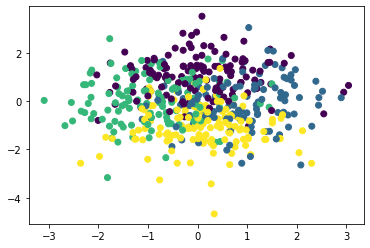

In [94]:
col_map = {0:"red", 1:"green", 2:"blue", 3:"pink"}
plt.scatter(x1, x2, c=y)

2.a) This strategy creates 4 different gaussian distributions and outputs a mixture of them. First a random number [0, 3] is generated, it determines which sub-gaussian distribution the sampled data will belong to. Then, it is transformed into multivariate distribution.

## K-MEANS

In [95]:
def k_means(k, max_iterations, threshold):
    # initial clusters and centroids determined randomly
#    clusters = random_clusters(k, x1, x2)
#    centroids = get_centroids(clusters, k)
    centroids = random_centroids(len(x1), k, x1, x2)
    clusters = new_clusters(x1, x2, centroids, k)
    # if visual:
    iteration_data = []
    iteration_data.append([clusters, k, centroids])
    #visualize(clusters, k, centroids)

    initial_objective_value = objective_function(clusters, centroids)
    objective_values = [initial_objective_value]
    for i in range(max_iterations):
        clusters = new_clusters(x1, x2, centroids, k)
        centroids = get_centroids(clusters, k)
        # if visual:
        iteration_data.append([clusters, k, centroids])
        # visualize(clusters, k, centroids)
        objective_value = objective_function(clusters, centroids)
        objective_values.append(objective_value)
        if objective_value <= threshold or objective_value == objective_values[i]:
            break
    # if visual:
   # plt.scatter(range(len(objective_values)), objective_values)
    #plt.plot(range(len(objective_values)), objective_values)
    #plt.show()
    return [objective_values, iteration_data]

In [96]:

def multiple_k_means(k):
    # iterations = [k_means(k, 10, 5) for i in range(5)]
    iteration_records = []
    for i in range(5):
        iteration_records.append(k_means(k, 10, 5))
    all_obj_vals = [iteration_records[i][0] for i in range(5)]
    last_obj_vals = [i[-1] for i in all_obj_vals]
    min_obj = min(last_obj_vals)
    min_ind = last_obj_vals.index(min_obj)
    best_iterations_data = iteration_records[min_ind][1]
    element = best_iterations_data[-1]
    cluster_iter = element[0]
    k_iter = element[1]
    centroid_iter = element[2]
    visualize(cluster_iter, k_iter, centroid_iter)
    objective_values = iteration_records[min_ind][0]
    plt.scatter(range(len(objective_values)), objective_values)
    plt.plot(range(len(objective_values)), objective_values)
    plt.show()

    return best_iterations_data[-1][0], best_iterations_data[-1][2]

In [97]:
def random_centroids(n, k, x1, x2):
    is_okay = False
    center_indexes = []
    while not is_okay:
        center_indexes = np.random.randint(0, n+1, size=k)
        indexes_set = set(center_indexes)
        if len(indexes_set) == k:
            is_okay = True
    centroids = []
    for ind in center_indexes:
        centroids.append([x1[ind], x2[ind]])
    return centroids


def new_clusters(x1, x2, centroids, k):
    clusters = [[[], []] for _ in range(k)]
    for i in range(len(x1)):
        new_class = closest_centroid(x1[i], x2[i], centroids, k)
        clusters[new_class][0].append(x1[i])
        clusters[new_class][1].append(x2[i])
    return clusters


def objective_function(clusters, centroids):
    total_distances = 0
    for i in range(len(clusters)):
        center = centroids[i]
        for j in range(len(clusters[i][0])):
            data_point_x1 = clusters[i][0][j]
            data_point_x2 = clusters[i][1][j]
            total_distances += euclidean_distance(data_point_x1, data_point_x2, center[0], center[1])**2
    return total_distances



def get_centroids(clusters, k):
    centroids = [[np.average(clusters[i][0]), np.average(clusters[i][1])] for i in range(k)]
    return centroids


def random_clusters(k, x1, x2):
    initial_labels = np.random.random_integers(low=0, high=k-1, size=x1.shape[0])
    clusters = [[[], []] for _ in range(k)]
    for ind, cluster_no in enumerate(initial_labels):
        clusters[cluster_no][0].append(x1[ind])
        clusters[cluster_no][1].append(x2[ind])
    return clusters



def optimal_k():
    s_vals = []
    for i in range(1, 9):
        s_val = silhouette(i)
        s_vals.append(s_val)
    best = max(s_vals)
    best_ind = s_vals.index(best)
    multiple_k_means(best_ind+1)
    return best_ind


def closest_centroid(data_x1, data_x2, centroids, k):
    distances = [euclidean_distance(data_x1, data_x2, centroids[ind][0], centroids[ind][1]) for ind in range(k)]
    return np.argmin(distances)


def euclidean_distance(data_x1, data_x2, other_x1, other_x2):
    return math.sqrt((other_x1 - data_x1)**2 + (other_x2 - data_x2)**2)


def visualize(clusters, k, centroids, special=False):
    colors = {0: "red", 1:"green", 2:"blue", 3:"yellow", 4:"pink", 5:"purple", 6:"cyan", 7:"navy", 8:"gray"}
    for i in range(k):
        plt.scatter(clusters[i][0], clusters[i][1], color=colors[i])
        plt.plot(centroids[i][0], centroids[i][1], 'ro', color="black")
    plt.show()

        

## K-Means results for 4 centroids, and loss function values for 10 iterations

<ipython-input-97-284e95210a96>:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(centroids[i][0], centroids[i][1], 'ro', color="black")


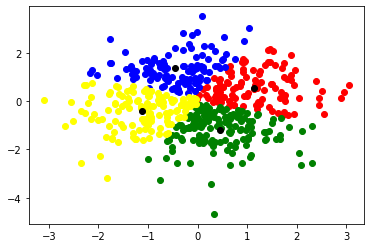

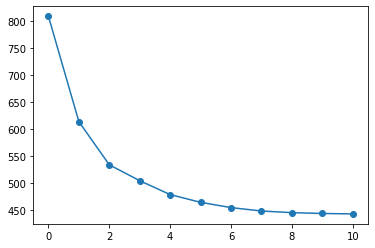

In [98]:
_ = multiple_k_means(4)

2.b) No. Since the distributions are not separate, as it can be seen in first plotting of the data, k-means is not a good fit for the dataset. Distances between same class datapoints vary a lot.

#### References:
* https://moodle.boun.edu.tr/pluginfile.php/1038922/mod_resource/content/1/Lec07-SVM.pdf - lecture slides
* https://www.cse.iitk.ac.in/users/rmittal/prev_course/s18/reports/7psdmatrices.pdf - positive semidefinite definition on page5.
* https://tr.overleaf.com/learn/latex/Matrices - latex documentation
* https://numpy.org/
* https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6
* https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
* https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
* https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/#:~:text=Inverse%20of%20a%20Matrix%20using,the%20inverse%20of%20a%20matrix.https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/#:~:text=Inverse%20of%20a%20Matrix%20using,the%20inverse%20of%20a%20matrix.
* https://pillow.readthedocs.io/en/stable/
* https://scikit-learn.org/stable/modules/svm.html
* https://cvxopt.org/examples/tutorial/qp.html
 

